# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

617

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/forecast?id=524901&APPID="
target_url = url + weather_api_key
#target_url

In [4]:
weather_response = requests.get(target_url)
weather_json = weather_response.json()
#print(json.dumps(weather_json, indent=4, sort_keys=True))

In [5]:
print(weather_json['city']['name'])

Moscow


In [6]:
cityname = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
count = 0

#  response = requests.get(query_url + city).json()
    
# Loop through the list of cities and perform a request for data on each

for city in cities:
    weather_response = requests.get(target_url + "&q=" + city + "&units=Imperial")
    weather_json = weather_response.json()
    try:
        cityname.append(weather_json['city']['name'])
        cloudiness.append(weather_json['list'][0]['clouds']['all'])
        country.append(weather_json['city']['country'])
        date.append(weather_json['list'][0]['dt'])
        humidity.append(weather_json['list'][0]['main']['humidity'])
        lat.append(weather_json['city']['coord']['lat'])
        lng.append(weather_json['city']['coord']['lon'])
        max_temp.append(weather_json['list'][0]['main']['temp_max'])
        wind_speed.append(weather_json['list'][0]['wind']['speed'])
        count = count + 1
        print(f"Processing record {count} of Set 1 | {city}")
    except:
        print("Record not found") 
        pass

Processing record 1 of Set 1 | sosua
Processing record 2 of Set 1 | luderitz
Processing record 3 of Set 1 | tygda
Processing record 4 of Set 1 | cape town
Processing record 5 of Set 1 | bandarbeyla
Processing record 6 of Set 1 | qaanaaq
Processing record 7 of Set 1 | skeldon
Processing record 8 of Set 1 | tual
Processing record 9 of Set 1 | novoagansk
Processing record 10 of Set 1 | zhigansk
Record not found
Processing record 11 of Set 1 | mount gambier
Processing record 12 of Set 1 | mataura
Processing record 13 of Set 1 | ponta do sol
Processing record 14 of Set 1 | tura
Processing record 15 of Set 1 | ahipara
Record not found
Processing record 16 of Set 1 | puerto baquerizo moreno
Processing record 17 of Set 1 | griffith
Processing record 18 of Set 1 | new norfolk
Processing record 19 of Set 1 | saint-philippe
Processing record 20 of Set 1 | rockland
Processing record 21 of Set 1 | butaritari
Processing record 22 of Set 1 | dikson
Processing record 23 of Set 1 | atuona
Processing re

Processing record 189 of Set 1 | flin flon
Processing record 190 of Set 1 | shimoda
Processing record 191 of Set 1 | jefferson city
Record not found
Processing record 192 of Set 1 | ust-nera
Processing record 193 of Set 1 | mahebourg
Processing record 194 of Set 1 | la peca
Processing record 195 of Set 1 | pangai
Processing record 196 of Set 1 | jumla
Processing record 197 of Set 1 | meulaboh
Record not found
Processing record 198 of Set 1 | cedar city
Processing record 199 of Set 1 | cabedelo
Processing record 200 of Set 1 | deputatskiy
Processing record 201 of Set 1 | mitsamiouli
Processing record 202 of Set 1 | almaznyy
Processing record 203 of Set 1 | ancud
Processing record 204 of Set 1 | dunedin
Processing record 205 of Set 1 | lompoc
Processing record 206 of Set 1 | sao miguel do araguaia
Processing record 207 of Set 1 | coos bay
Processing record 208 of Set 1 | athabasca
Processing record 209 of Set 1 | torbay
Processing record 210 of Set 1 | gua musang
Processing record 211 of

Processing record 379 of Set 1 | sidney
Processing record 380 of Set 1 | piacabucu
Processing record 381 of Set 1 | bengkulu
Processing record 382 of Set 1 | airai
Processing record 383 of Set 1 | vaitape
Processing record 384 of Set 1 | salalah
Processing record 385 of Set 1 | bonnyville
Processing record 386 of Set 1 | saskylakh
Processing record 387 of Set 1 | dekar
Processing record 388 of Set 1 | guilin
Processing record 389 of Set 1 | simpang
Processing record 390 of Set 1 | lima
Processing record 391 of Set 1 | somerset
Processing record 392 of Set 1 | hastings
Processing record 393 of Set 1 | khani
Processing record 394 of Set 1 | shakawe
Processing record 395 of Set 1 | xining
Processing record 396 of Set 1 | noumea
Processing record 397 of Set 1 | george town
Processing record 398 of Set 1 | port hedland
Processing record 399 of Set 1 | bom jesus
Processing record 400 of Set 1 | faya
Processing record 401 of Set 1 | sangar
Processing record 402 of Set 1 | srednekolymsk
Record

Processing record 570 of Set 1 | tecoanapa
Processing record 571 of Set 1 | kargasok
Processing record 572 of Set 1 | esperance
Processing record 573 of Set 1 | fenoarivo
Processing record 574 of Set 1 | jijiga
Processing record 575 of Set 1 | taltal
Processing record 576 of Set 1 | nueva concepcion


In [7]:
weather_city = {"City": cityname,"Latitude": lat, "Longitude":lng,
                "Max Temp":max_temp,"Humidity":humidity,"Cloudiness":cloudiness,
                "Wind Speed":wind_speed,"Country":country, "Date":date}
weather_df = pd.DataFrame(weather_city)
weather_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,El Batey,19.7667,-70.5167,76.05,83,39,10.67,DO,1613271600
1,Lüderitz,-26.6481,15.1594,64.71,83,0,8.61,NA,1613271600
2,Tygda,53.1167,126.3333,-4.07,89,90,7.58,RU,1613271600
3,Cape Town,-33.9258,18.4232,67.32,91,57,7.70,ZA,1613271600
4,Bandarbeyla,9.4942,50.8122,72.46,77,27,10.92,SO,1613271600


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
weather_df.to_csv(r'output_data\my_weather_data.csv')
city_df = len(weather_df)
city_df

576

In [9]:
weather_df

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,El Batey,19.7667,-70.5167,76.05,83,39,10.67,DO,1613271600
1,Lüderitz,-26.6481,15.1594,64.71,83,0,8.61,NA,1613271600
2,Tygda,53.1167,126.3333,-4.07,89,90,7.58,RU,1613271600
3,Cape Town,-33.9258,18.4232,67.32,91,57,7.70,ZA,1613271600
4,Bandarbeyla,9.4942,50.8122,72.46,77,27,10.92,SO,1613271600
...,...,...,...,...,...,...,...,...,...
571,Esperance,-33.8667,121.9000,77.23,62,44,10.69,AU,1613271600
572,Fenoarivo,-18.9330,47.4354,63.41,95,87,3.20,MG,1613271600
573,Jijiga,9.3500,42.8000,57.20,36,12,5.64,ET,1613271600
574,Taltal,-25.4000,-70.4833,67.30,71,9,5.26,CL,1613271600


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
city_weather_df = weather_df.loc[(weather_df["Humidity"] > 100), :]
city_weather_df = city_weather_df.dropna(how='any')
city_weather_df.reset_index(inplace=False)
city_weather_df

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

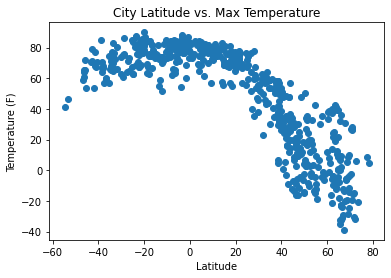

In [11]:
# Incorporate the other graph properties
# Save the figure
# Show plot
plot_lat = weather_df["Latitude"]
plot_temp = weather_df["Max Temp"]

plt.scatter(plot_lat,plot_temp)
plt.title('City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.savefig('plot_latitude_vs_temp')
plt.show()

#This code is analyzing the max temperature of each city and latitude.

## Latitude vs. Humidity Plot

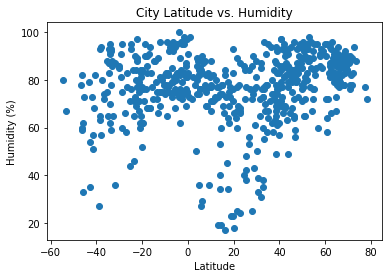

In [12]:
plot_humidity = weather_df["Humidity"]

plt.scatter(plot_lat,plot_humidity)
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig('plot_latitude_vs_humidity')
plt.show()

## Latitude vs. Cloudiness Plot

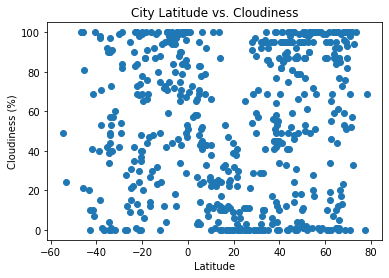

In [13]:
plot_cloudiness = weather_df["Cloudiness"]

plt.scatter(plot_lat,plot_cloudiness)
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig('plot_latitude_vs_cloudiness')
plt.show()

## Latitude vs. Wind Speed Plot

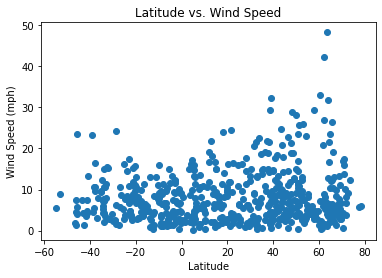

In [14]:
wind_speed = weather_df["Wind Speed"]

plt.scatter(plot_lat,wind_speed)
plt.title('Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig('plot_latitude_vs_windspeed')
plt.show()

## Linear Regression

In [15]:
 def plot_linear_regression(x_values, y_values, title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=14,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [16]:
northlat_df = weather_df.loc[weather_df["Latitude"] >= 0,:]
southlat_df = weather_df.loc[weather_df["Latitude"] < 0,:]

northlat_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,El Batey,19.7667,-70.5167,76.05,83,39,10.67,DO,1613271600
2,Tygda,53.1167,126.3333,-4.07,89,90,7.58,RU,1613271600
4,Bandarbeyla,9.4942,50.8122,72.46,77,27,10.92,SO,1613271600
5,Qaanaaq,77.4840,-69.3632,8.62,77,0,5.68,GL,1613271600
6,Skeldon,5.8833,-57.1333,76.28,89,51,7.87,GY,1613271600


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8702134867232262


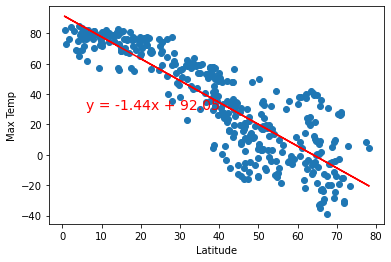

<Figure size 432x288 with 0 Axes>

In [17]:
x_values = northlat_df["Latitude"]
y_values = northlat_df["Max Temp"]
plot_linear_regression(x_values,y_values,'Max Temp',(6,30))

plt.savefig('northernhemisphere_temp_lat')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.49261439673350016


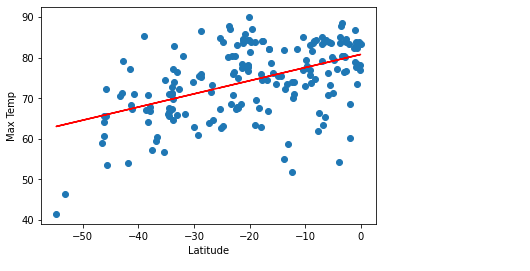

<Figure size 432x288 with 0 Axes>

In [18]:
x_values = southlat_df["Latitude"]
y_values = southlat_df["Max Temp"]
plot_linear_regression(x_values,y_values,'Max Temp',(6,30))

plt.savefig('southernhemisphere_temp_lat')



####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.3807286023924303


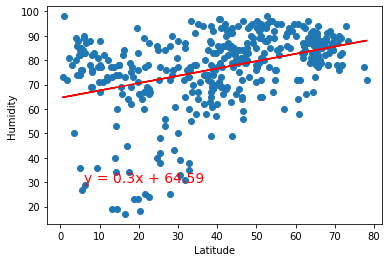

<Figure size 432x288 with 0 Axes>

In [19]:
x_values = northlat_df["Latitude"]
y_values = northlat_df["Humidity"]
plot_linear_regression(x_values,y_values,'Humidity',(6,30))

plt.savefig('northernhemisphere_humidity_lat')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.31121429341194823


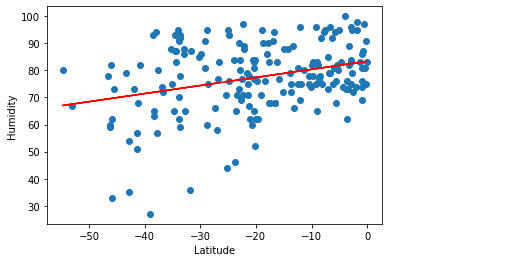

<Figure size 432x288 with 0 Axes>

In [20]:
x_values = southlat_df["Latitude"]

y_values = southlat_df["Humidity"]
plot_linear_regression(x_values,y_values,'Humidity',(6,30))

plt.savefig('southernhemisphere_humidity_lat')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.31060688610974124


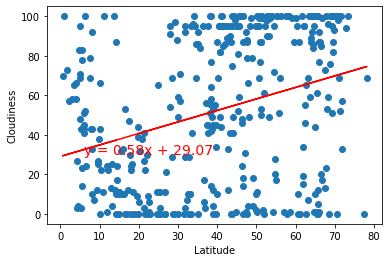

<Figure size 432x288 with 0 Axes>

In [21]:
x_values = northlat_df["Latitude"]
y_values = northlat_df["Cloudiness"]
plot_linear_regression(x_values,y_values,'Cloudiness',(6,30))

plt.savefig('northernhemisphere_cloudiness_lat')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.2936256937556308


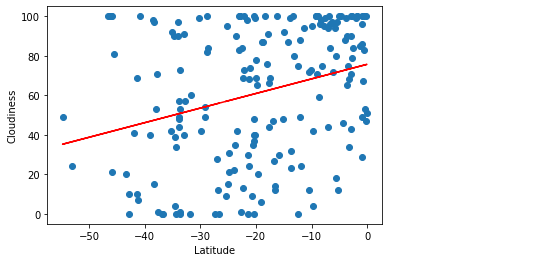

<Figure size 432x288 with 0 Axes>

In [22]:
x_values = southlat_df["Latitude"]
y_values = southlat_df["Cloudiness"]
plot_linear_regression(x_values,y_values,'Cloudiness',(6,30))

plt.savefig('southernhemisphere_cloudiness_lat')



####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0700546897580067


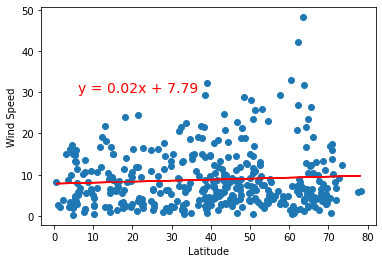

<Figure size 432x288 with 0 Axes>

In [23]:
x_values = northlat_df["Latitude"]
y_values = northlat_df["Wind Speed"]
plot_linear_regression(x_values,y_values,'Wind Speed',(6,30))

plt.savefig('northernhemisphere_windspeed_lat')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.17565925776666416


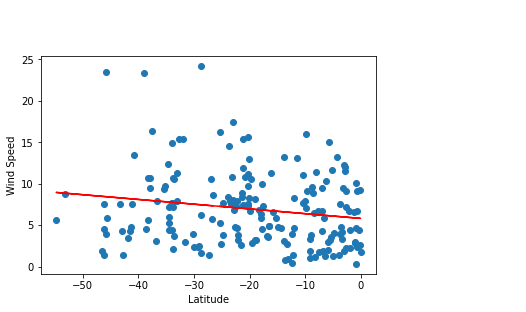

<Figure size 432x288 with 0 Axes>

In [24]:
x_values = southlat_df["Latitude"]
y_values = southlat_df["Wind Speed"]
plot_linear_regression(x_values,y_values,'Wind Speed',(6,30))

plt.savefig('southernhemisphere_windspeed_lat')

